In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('financials.csv') 
features = ['Price/Earnings','Dividend Yield','Earnings/Share','52 Week Low',
            '52 Week High','Market Cap','EBITDA','Price/Sales','Price/Book']
X = df[features].fillna(df[features].mean())
y = df['Sector']

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
param_grid = {'n_neighbors': range(1,16), 'p':[1,2]}  # K=1~15, p=1/2
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1_macro', return_train_score=True)
grid.fit(X_train, y_train)
print("最佳参数:", grid.best_params_)
print("最佳交叉验证 F1:", grid.best_score_)

c:\Users\duckd\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


最佳参数: {'n_neighbors': 9, 'p': 2}
最佳交叉验证 F1: 0.34513647731747865


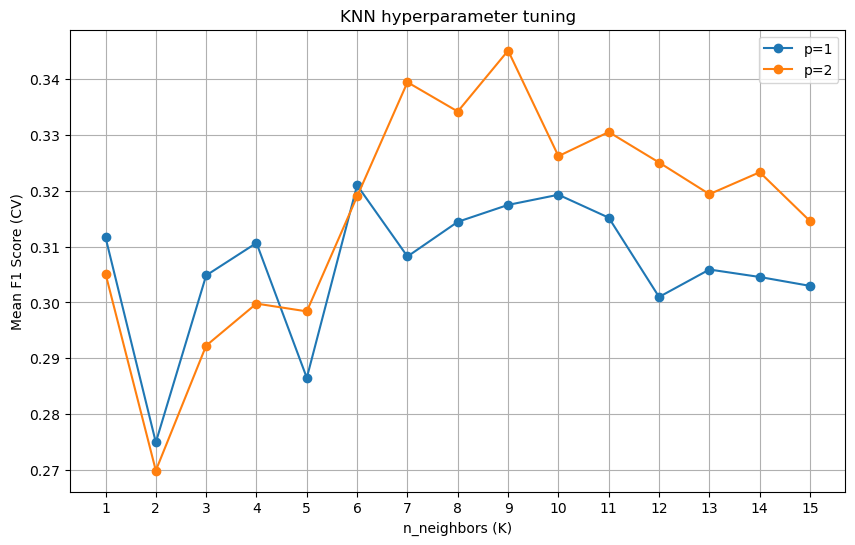

In [11]:
results = pd.DataFrame(grid.cv_results_)
plt.figure(figsize=(10,6))
for p_val in [1,2]:
    subset = results[results['param_p']==p_val]
    plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], marker='o', label=f'p={p_val}')
plt.xlabel('n_neighbors (K)')
plt.ylabel('Mean F1 Score (CV)')
plt.title('KNN hyperparameter tuning')
plt.xticks(range(1,16))
plt.grid(True)
plt.legend()
plt.show()

c:\Users\duckd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\duckd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\duckd\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


分类报告:
                             precision    recall  f1-score   support

    Consumer Discretionary       0.17      0.24      0.20        17
          Consumer Staples       0.25      0.14      0.18         7
                    Energy       0.40      0.33      0.36         6
                Financials       0.29      0.38      0.33        13
               Health Care       0.33      0.17      0.22        12
               Industrials       0.20      0.15      0.17        13
    Information Technology       0.29      0.43      0.34        14
                 Materials       0.00      0.00      0.00         5
               Real Estate       0.71      0.71      0.71         7
Telecommunication Services       0.00      0.00      0.00         1
                 Utilities       0.38      0.50      0.43         6

                  accuracy                           0.30       101
                 macro avg       0.28      0.28      0.27       101
              weighted avg       0.28  

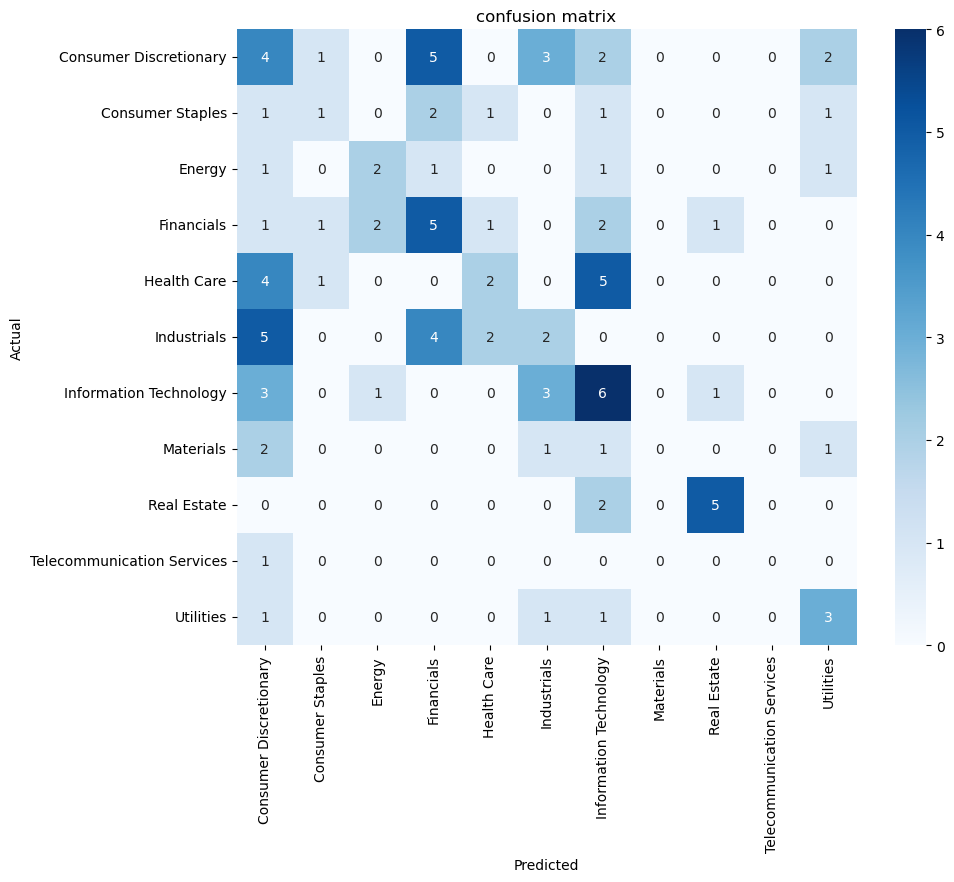

In [10]:
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)
print("分类报告:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion matrix')
plt.show()